In [1]:
from qiskit import *
from qiskit.circuit.library import QFT
import numpy as np

from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, \
Estimator, Session, Options

service = QiskitRuntimeService(channel='ibm_quantum')

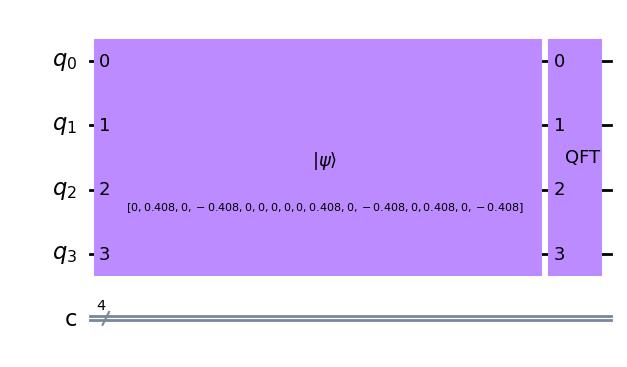

In [2]:
q = QuantumRegister(4,'q') 
c = ClassicalRegister(4,'c') 
qc = QuantumCircuit(q,c)
x = [4*k/16 for k in range(16)]
psi = np.sin(2*np.array(x)*np.pi)
psi[5:8] = 0
psi = psi/np.linalg.norm(psi)
qc.initialize(psi)
qft = QFT(num_qubits=4, do_swaps=True).to_gate()
qc.append(qft, qargs=[0, 1, 2, 3])
qc.draw('mpl')
#qc.draw('mpl').savefig('/home/jovyan/My_Notebooks/Images/qTest_1_0.png')

In [3]:
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(qc, simulator)
job = assemble(compiled_circuit, shots=1)
result = simulator.run(job).result()

# Pobranie wektora stanu
state_vector = result.get_statevector()

print("Wektor stanu:", np.round(state_vector, 4))

Wektor stanu: [ 0.    +0.j     -0.0552-0.0552j  0.1443-0.j     -0.1334+0.1334j
 -0.    +0.6124j  0.1334+0.1334j -0.1443+0.j      0.0552-0.0552j
 -0.    -0.j      0.0552+0.0552j -0.1443-0.j      0.1334-0.1334j
 -0.    -0.6124j -0.1334-0.1334j  0.1443-0.j     -0.0552+0.0552j]


/tmp/ipykernel_93/2201259805.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(job).result()


In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy as cp
mpl.rcParams.update(mpl.rcParamsDefault)

In [5]:
plt.figure(figsize=(9.2, 4.8))
plt.scatter([4*k/16 for k in range(16)], np.abs(state_vector), c="violet")
plt.title("Absolute values of the frequencies after QFT")
plt.xlabel(r"Frequencies")
plt.ylabel(r"$|q\mathcal{F}(\psi)|$")
plt.savefig('/home/jovyan/My_Notebooks/Images/qTest_1_1.png')

In [6]:
state_vector2 = np.asarray(cp.copy(state_vector))
#print(np.abs(state_vector2))
state_vector2[np.abs(state_vector2)<=0.5] = 0
state_vector2 = state_vector2/np.linalg.norm(state_vector2)
print(state_vector2)

[ 0.00000000e+00+0.j          0.00000000e+00+0.j
  0.00000000e+00+0.j          0.00000000e+00+0.j
 -1.01028207e-16+0.70710678j  0.00000000e+00+0.j
  0.00000000e+00+0.j          0.00000000e+00+0.j
  0.00000000e+00+0.j          0.00000000e+00+0.j
  0.00000000e+00+0.j          0.00000000e+00+0.j
 -6.20601840e-16-0.70710678j  0.00000000e+00+0.j
  0.00000000e+00+0.j          0.00000000e+00+0.j        ]


In [7]:
q = QuantumRegister(4,'q') 
c = ClassicalRegister(4,'c') 
qc = QuantumCircuit(q,c)
x = [4*k/16 for k in range(16)]
qpsi = state_vector2
qc.initialize(qpsi)
qc.barrier()
iqft = QFT(num_qubits=4, do_swaps=True, inverse=True).to_gate()
qc.append(iqft, qargs=[0, 1, 2, 3])
qc.draw('mpl')
qc.draw('mpl').savefig('/home/jovyan/My_Notebooks/Images/qTest_1_2.png')

In [8]:
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(qc, simulator)
job = assemble(compiled_circuit, shots=1)
result = simulator.run(job).result()

# Pobranie wektora stanu
state_vector3 = result.get_statevector()

print("Wektor stanu:", np.round(state_vector3, 4))

Wektor stanu: [-0.    +0.j  0.3536-0.j  0.    -0.j -0.3536+0.j -0.    +0.j  0.3536-0.j
  0.    -0.j -0.3536+0.j -0.    +0.j  0.3536-0.j  0.    -0.j -0.3536+0.j
 -0.    +0.j  0.3536-0.j  0.    -0.j -0.3536+0.j]


/tmp/ipykernel_93/2948363827.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(job).result()


In [10]:
print(np.sum(np.array(state_vector3)**2))

(1-9.797174393178828e-16j)


In [40]:
plt.figure(figsize=(9.2, 4.8))
plt.scatter([4*k/16 for k in range(16)], np.real(state_vector3), c="violet")
plt.title(r"Reconstructed signal using QFT")
plt.xlabel(r"Given nodes $x_k$")
plt.ylabel(r"Reconstructed values")
plt.savefig('/home/jovyan/My_Notebooks/Images/qTest_1_3.png')